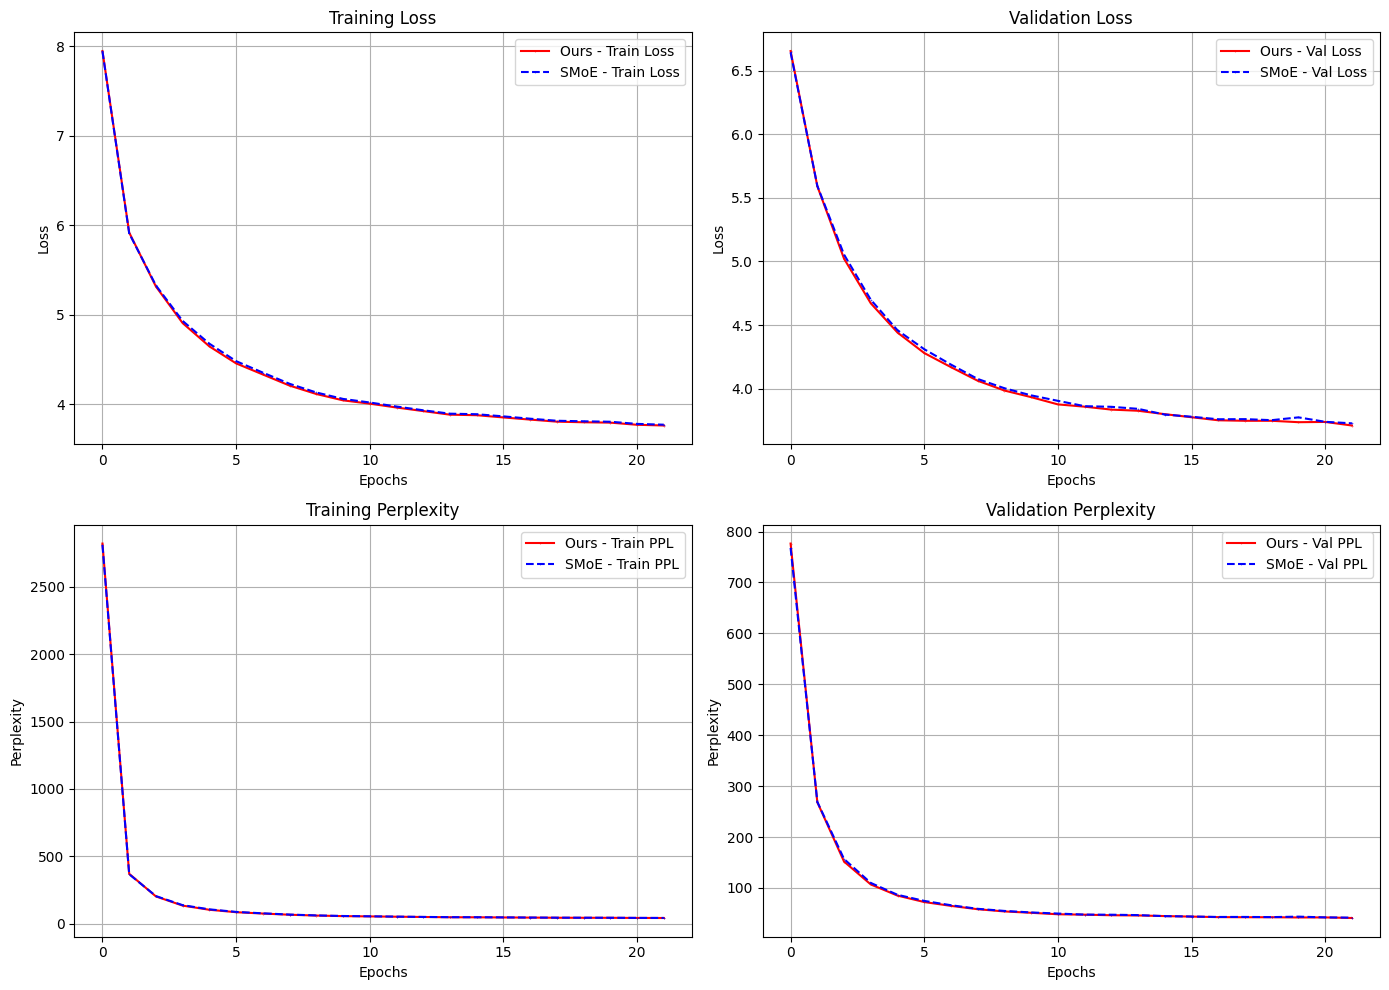

In [12]:
import matplotlib.pyplot as plt

# Function to parse data from a given file
def parse_data(file_path):
    epochs = []
    loss_train = []
    loss_val = []
    ppl_train = []
    ppl_val = []
    
    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if line.startswith("Epochs:"):
                parts = line.split("|")
                epochs.append(int(parts[0].split(":")[1].strip()))
                loss_train.append(float(parts[1].split(":")[1].split("~")[0].strip()))
                ppl_train.append(float(parts[1].split("~")[1].split()[0].strip()))
                loss_val.append(float(parts[2].split(":")[1].split("~")[0].strip()))
                ppl_val.append(float(parts[2].split("~")[1].split()[0].strip()))
    
    return epochs, loss_train, loss_val, ppl_train, ppl_val

# Parse the data
ours_file = 'data/Ours.txt'
smoe_file = 'data/SMoE.txt'

epochs_ours, loss_train_ours, loss_val_ours, ppl_train_ours, ppl_val_ours = parse_data(ours_file)
epochs_smoe, loss_train_smoe, loss_val_smoe, ppl_train_smoe, ppl_val_smoe = parse_data(smoe_file)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Train Loss
axs[0, 0].plot(epochs_ours, loss_train_ours, label='Ours - Train Loss', color='red', marker='o', markersize=0.2)
axs[0, 0].plot(epochs_smoe, loss_train_smoe, label='SMoE - Train Loss', color='blue', linestyle='--', marker='s', markersize=0.2)
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].set_title('Training Loss')
axs[0, 0].legend()
axs[0, 0].grid()

# Validation Loss
axs[0, 1].plot(epochs_ours, loss_val_ours, label='Ours - Val Loss', color='red', marker='o', markersize=0.2)
axs[0, 1].plot(epochs_smoe, loss_val_smoe, label='SMoE - Val Loss', color='blue', linestyle='--', marker='s', markersize=0.2)
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].set_title('Validation Loss')
axs[0, 1].legend()
axs[0, 1].grid()

# Train PPL
axs[1, 0].plot(epochs_ours, ppl_train_ours, label='Ours - Train PPL', color='red', marker='o', markersize=0.2)
axs[1, 0].plot(epochs_smoe, ppl_train_smoe, label='SMoE - Train PPL', color='blue', linestyle='--', marker='s', markersize=0.2)
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Perplexity')
axs[1, 0].set_title('Training Perplexity')
axs[1, 0].legend()
axs[1, 0].grid()

# Validation PPL
axs[1, 1].plot(epochs_ours, ppl_val_ours, label='Ours - Val PPL', color='red', marker='o', markersize=0.2)
axs[1, 1].plot(epochs_smoe, ppl_val_smoe, label='SMoE - Val PPL', color='blue', linestyle='--', marker='s', markersize=0.2)
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Perplexity')
axs[1, 1].set_title('Validation Perplexity')
axs[1, 1].legend()
axs[1, 1].grid()

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('comparison.png')
plt.show()


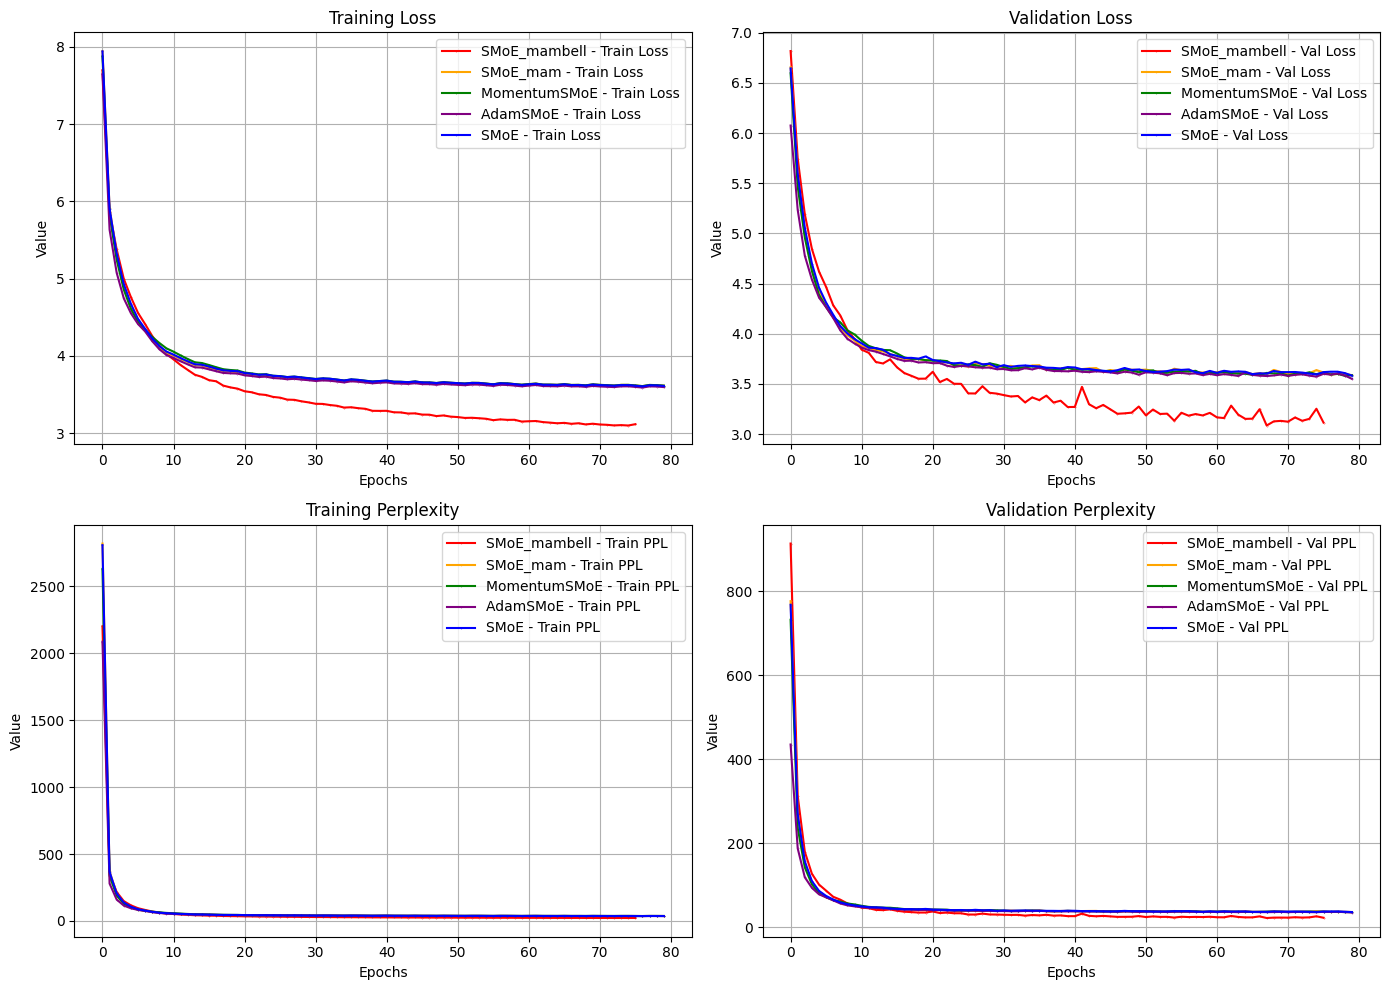

In [1]:
import matplotlib.pyplot as plt

# Function to parse data from a given file
def parse_data(file_path):
    epochs = []
    loss_train = []
    loss_val = []
    ppl_train = []
    ppl_val = []
    
    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if line.startswith("Epochs:"):
                parts = line.split("|")
                epochs.append(int(parts[0].split(":")[1].strip()))
                loss_train.append(float(parts[1].split(":")[1].split("~")[0].strip()))
                ppl_train.append(float(parts[1].split("~")[1].split()[0].strip()))
                loss_val.append(float(parts[2].split(":")[1].split("~")[0].strip()))
                ppl_val.append(float(parts[2].split("~")[1].split()[0].strip()))
    
    return epochs, loss_train, loss_val, ppl_train, ppl_val

# File paths and colors
files = {
    "SMoE_mambell": {"file": "data/SMoE_mambell.txt", "color": "red"},
    "SMoE_mam": {"file": "data/SMoE_mam.txt", "color": "orange"},
    "MomentumSMoE": {"file": "data/MomentumSMoE.txt", "color": "green"},
    "AdamSMoE": {"file": "data/AdamSMoE.txt", "color": "purple"},
    "SMoE": {"file": "data/SMoE.txt", "color": "blue"},
}

# Parsing data
data = {}
for key, info in files.items():
    data[key] = parse_data(info["file"])

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for key, info in files.items():
    epochs, loss_train, loss_val, ppl_train, ppl_val = data[key]
    color = info["color"]
    
    # Train Loss
    axs[0, 0].plot(epochs, loss_train, label=f'{key} - Train Loss', color=color, marker='o', markersize=0.2)
    
    # Validation Loss
    axs[0, 1].plot(epochs, loss_val, label=f'{key} - Val Loss', color=color, marker='o', markersize=0.2)
    
    # Train PPL
    axs[1, 0].plot(epochs, ppl_train, label=f'{key} - Train PPL', color=color, marker='o', markersize=0.2)
    
    # Validation PPL
    axs[1, 1].plot(epochs, ppl_val, label=f'{key} - Val PPL', color=color, marker='o', markersize=0.2)

# Setting labels, titles, legends, and grids
titles = ['Training Loss', 'Validation Loss', 'Training Perplexity', 'Validation Perplexity']
for ax, title in zip(axs.flat, titles):
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Value')
    ax.set_title(title)
    ax.legend()
    ax.grid()

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('comparison.png')
plt.show()
